In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Other utilities
import os

Data loaded successfully.

--- Plotting Churn Distribution ---


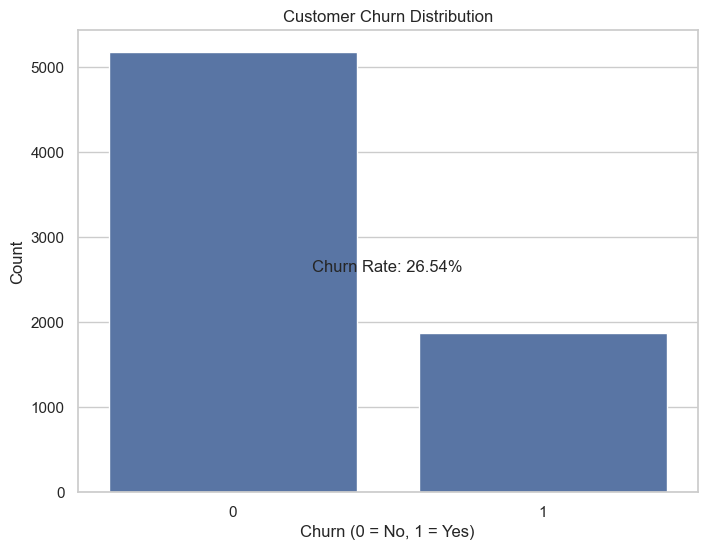


--- Plotting Numerical Feature Distributions by Churn ---


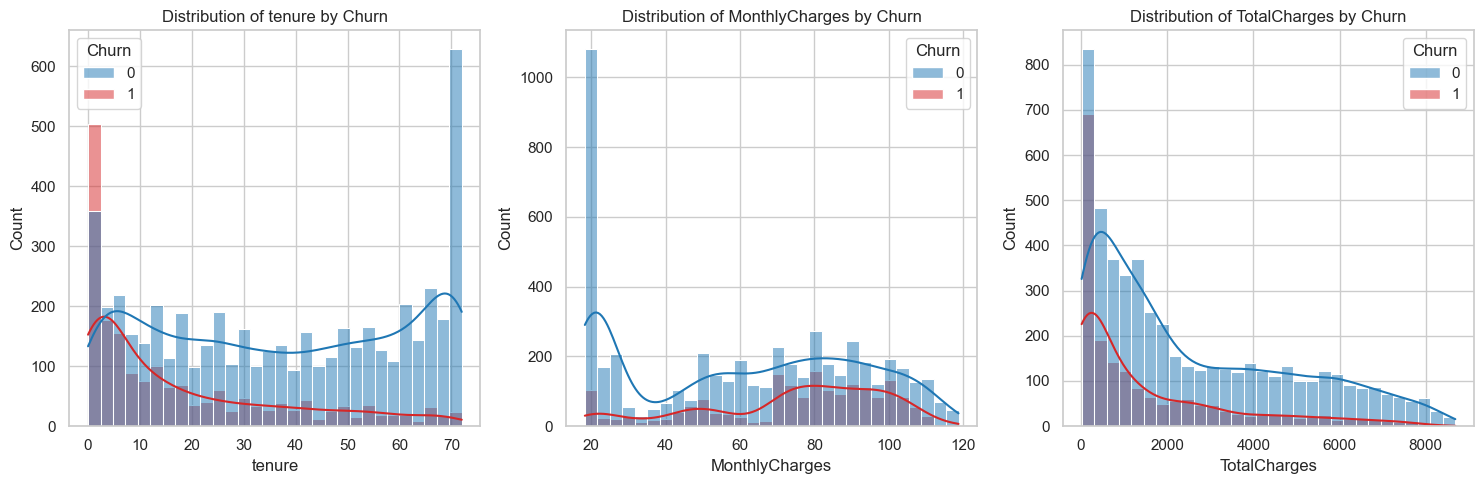


--- Plotting Churn Rate by Categorical Features ---


C:\Users\singh\AppData\Local\Temp\ipykernel_12188\3904643047.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=temp_df.reset_index(), x=col, y=1, palette=['#d62728'], ax=plt.gca()) # Plot only Churn=1 rate
C:\Users\singh\AppData\Local\Temp\ipykernel_12188\3904643047.py:60: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=temp_df.reset_index(), x=col, y=1, palette=['#d62728'], ax=plt.gca()) # Plot only Churn=1 rate
C:\Users\singh\AppData\Local\Temp\ipykernel_12188\3904643047.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=temp_df.reset_index(), x=col, y=1, palette=['#d62728'], 

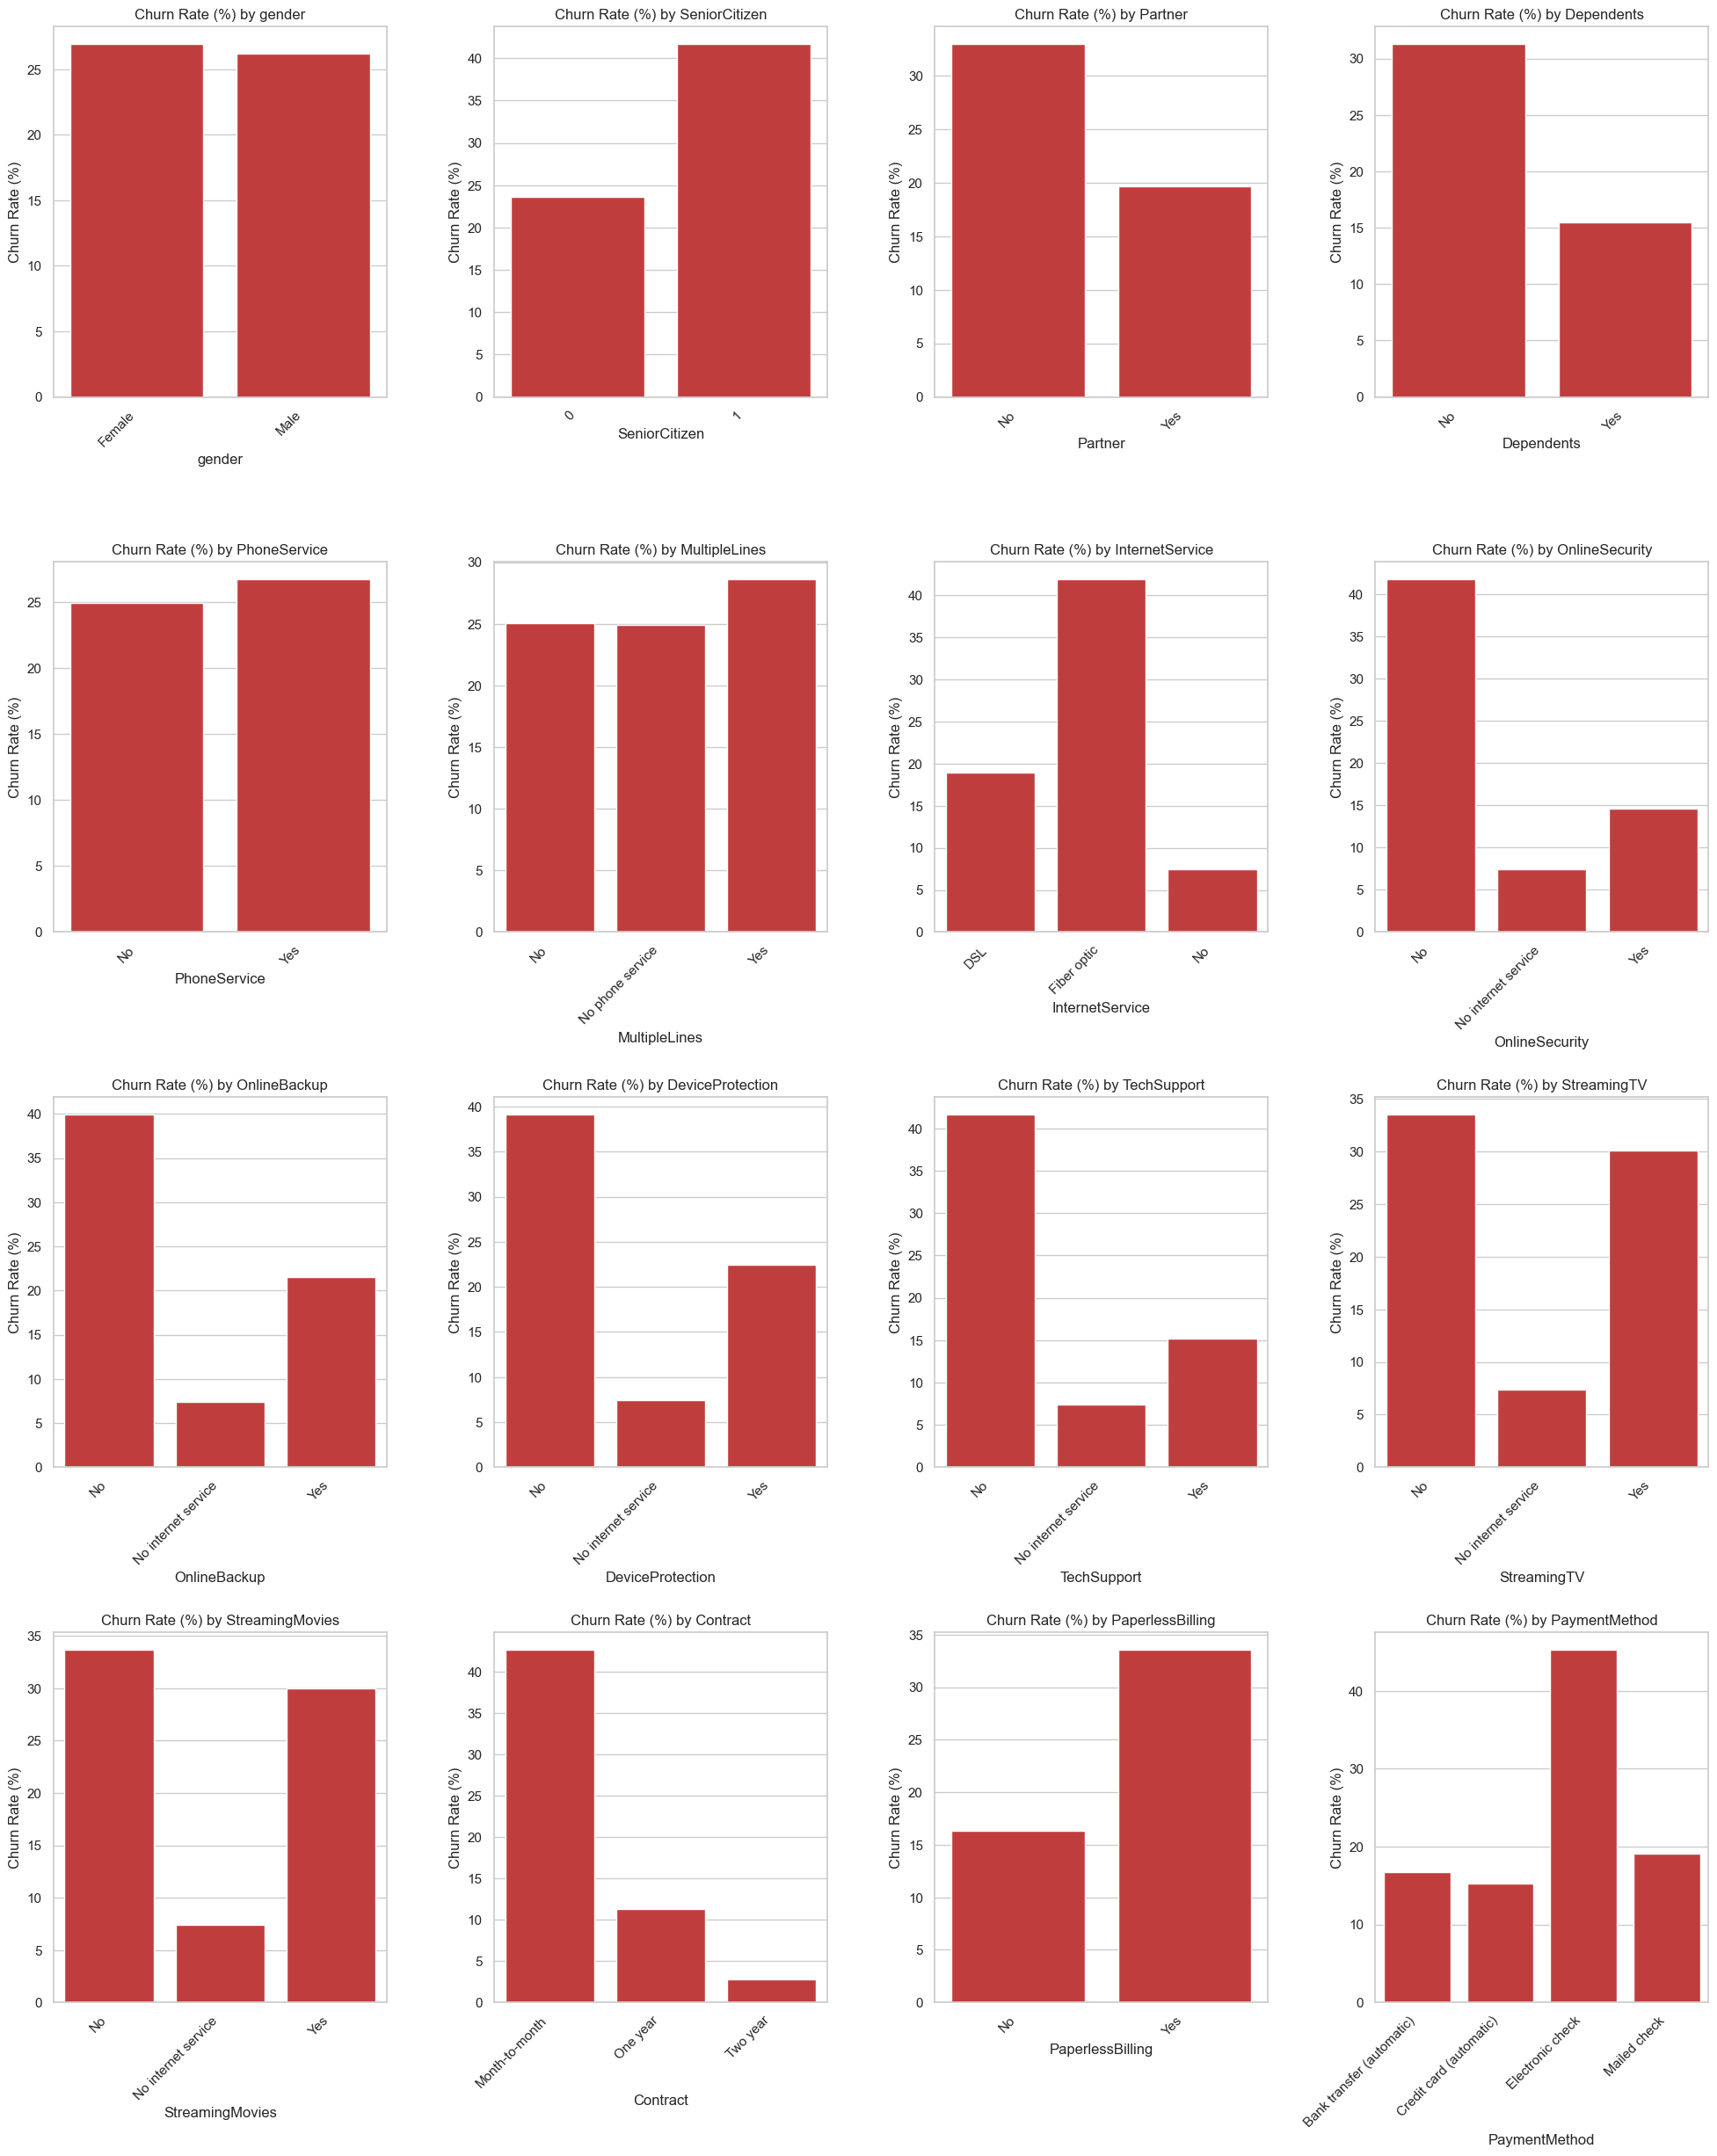


--- Calculating Correlation of Numerical Features with Churn ---


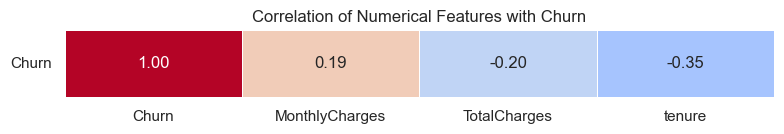


Correlation values with Churn:
Churn             1.000000
MonthlyCharges    0.193356
TotalCharges     -0.199428
tenure           -0.352229
Name: Churn, dtype: float64

--- Plotting Tenure vs Churn (Box Plot) ---


C:\Users\singh\AppData\Local\Temp\ipykernel_12188\3904643047.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df, palette=['#1f77b4', '#d62728'])


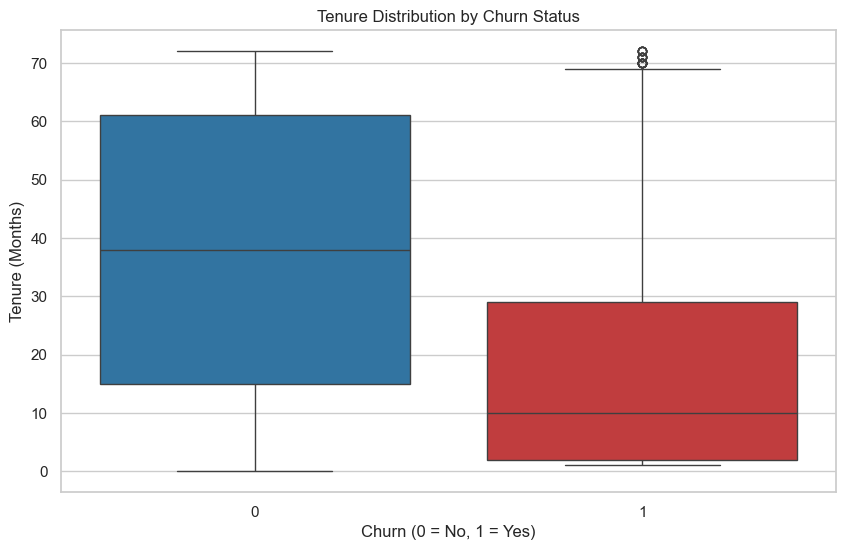


--- Plotting Churn Rate by Contract Type ---


C:\Users\singh\AppData\Local\Temp\ipykernel_12188\3904643047.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=contract_churn.reset_index(), x='Contract', y=1, palette=['#d62728'])
C:\Users\singh\AppData\Local\Temp\ipykernel_12188\3904643047.py:113: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=contract_churn.reset_index(), x='Contract', y=1, palette=['#d62728'])


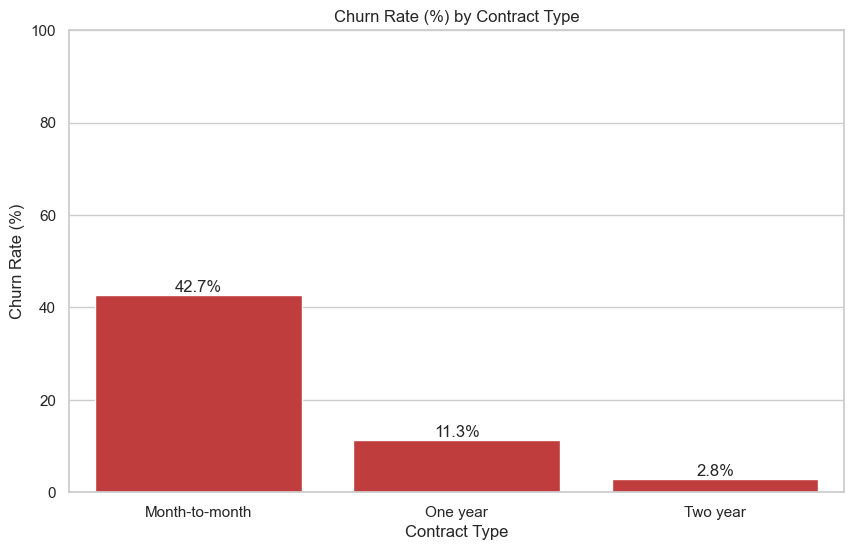


Key Insights from EDA:
1. Overall churn rate is 26.54% [cite: 1]
2. Customers with month-to-month contracts have significantly higher churn rates
3. Customers with shorter tenure are more likely to churn
4. Fiber optic internet service users show higher churn rates
5. Customers without online security, tech support, or backup services have higher churn rates
6. Higher monthly charges correlate with increased churn


In [2]:
# Load cleaned data
try:
    df = pd.read_csv('C:/churn_prediction/notebooks/data/processed/telco_clean.csv') # Using telco_clean.csv [cite: 1]
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: 'C:/churn_prediction/notebooks/data/processed/telco_clean.csv' not found. Please ensure the path is correct.")
    # Handle the error appropriately, e.g., exit() or raise

# Ensure the directory for saving figures exists
os.makedirs('notebooks/figures', exist_ok=True)

# Set the style for visualizations
plt.style.use('ggplot')
sns.set_theme(style='whitegrid')

# --- 1. Churn Distribution ---
print("\n--- Plotting Churn Distribution ---")
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df)
plt.title('Customer Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
# Calculate churn rate using the existing numeric 'Churn' column [cite: 1]
churn_rate = df['Churn'].mean() * 100
plt.annotate(f'Churn Rate: {churn_rate:.2f}%', xy=(0.5, df['Churn'].value_counts().max()/2), ha='center')
plt.savefig('notebooks/figures/churn_distribution.png')
plt.show()

# --- 2. Numerical Features Distribution ---
print("\n--- Plotting Numerical Feature Distributions by Churn ---")
# Define numerical columns based on telco_clean.csv [cite: 1]
# SeniorCitizen is technically numeric (0/1) but often treated as categorical; let's plot it separately if needed.
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(data=df, x=col, hue='Churn', kde=True, bins=30, palette=['#1f77b4', '#d62728']) # Example palette
    plt.title(f'Distribution of {col} by Churn')
plt.tight_layout()
plt.savefig('notebooks/figures/numerical_features_distribution.png')
plt.show()

# --- 3. Categorical Features Analysis ---
print("\n--- Plotting Churn Rate by Categorical Features ---")
# Define categorical columns based on telco_clean.csv [cite: 1]
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                    'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

plt.figure(figsize=(20, 25)) # Adjusted figsize might be needed depending on screen/output
plot_rows = (len(categorical_cols) + 3) // 4 # Calculate needed rows dynamically
for i, col in enumerate(categorical_cols):
    plt.subplot(plot_rows, 4, i+1)
    # Calculate percentages for churn rate
    temp_df = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    # Plotting using seaborn for better aesthetics potentially
    sns.barplot(data=temp_df.reset_index(), x=col, y=1, palette=['#d62728'], ax=plt.gca()) # Plot only Churn=1 rate
    plt.title(f'Churn Rate (%) by {col}')
    plt.ylabel('Churn Rate (%)')
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right') # Improve label readability
    # Annotate bars if needed (can make plots busy)
    # for container in plt.gca().containers:
    #    plt.gca().bar_label(container, fmt='%.1f%%')
plt.tight_layout(pad=2.0) # Add padding
plt.savefig('notebooks/figures/categorical_features_churn_rate.png')
plt.show()

# --- 4. Correlation Analysis (Optimized) ---
print("\n--- Calculating Correlation of Numerical Features with Churn ---")
# Select only numerical features and the target variable 'Churn'
# Make sure 'Churn' is numeric (0/1) which it is in telco_clean.csv [cite: 1]
numerical_and_target_cols = numerical_cols + ['Churn']
df_numerical_target = df[numerical_and_target_cols]

# Calculate the correlation matrix for this subset
corr_matrix_subset = df_numerical_target.corr()

# Plot a heatmap focused on correlations with 'Churn'
plt.figure(figsize=(8, 1.5)) # Smaller figure suitable for a single row/column
sns.heatmap(corr_matrix_subset[['Churn']].sort_values(by='Churn', ascending=False).T, # Transpose for horizontal bar
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1, cbar=False)
plt.title('Correlation of Numerical Features with Churn')
plt.yticks(rotation=0) # Keep y-axis label horizontal
plt.tight_layout()
plt.savefig('notebooks/figures/correlation_numerical_vs_churn.png')
plt.show()

# Optional: Print the correlation values with Churn
print("\nCorrelation values with Churn:")
print(corr_matrix_subset['Churn'].sort_values(ascending=False))

# --- 5. Tenure and Churn (Box Plot) ---
print("\n--- Plotting Tenure vs Churn (Box Plot) ---")
plt.figure(figsize=(10, 6)) # Slightly adjusted size
sns.boxplot(x='Churn', y='tenure', data=df, palette=['#1f77b4', '#d62728'])
plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Tenure (Months)')
plt.savefig('notebooks/figures/tenure_vs_churn_boxplot.png')
plt.show()

# --- 6. Contract Type and Churn ---
# Note: This visualization is similar to the one in step 3, but focuses on just 'Contract'.
# We can reuse the crosstab calculation.
print("\n--- Plotting Churn Rate by Contract Type ---")
plt.figure(figsize=(10, 6))
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
# Use seaborn barplot again for consistency
sns.barplot(data=contract_churn.reset_index(), x='Contract', y=1, palette=['#d62728'])
plt.title('Churn Rate (%) by Contract Type')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Contract Type')
plt.xticks(rotation=0) # Horizontal labels are fine here
# Annotate bars
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')
plt.ylim(0, 100) # Set y-limit to 100%
plt.savefig('notebooks/figures/contract_vs_churn_barplot.png')
plt.show()

# --- 7. Key Insights Summary ---
print("\nKey Insights from EDA:")
print(f"1. Overall churn rate is {churn_rate:.2f}% [cite: 1]")
print("2. Customers with month-to-month contracts have significantly higher churn rates") # Insight from plot 3/6
print("3. Customers with shorter tenure are more likely to churn") # Insight from plot 2/5
print("4. Fiber optic internet service users show higher churn rates") # Insight from plot 3
print("5. Customers without online security, tech support, or backup services have higher churn rates") # Insight from plot 3
print("6. Higher monthly charges correlate with increased churn") # Insight from plot 2/4